In [17]:
# Import dataset
import pandas as pd
hail_events = r'/Users/brianwang/Desktop/Quantify Case Competition/hail_events.csv'
fire_events = r'/Users/brianwang/Desktop/Quantify Case Competition/fire_events.csv'
flood_events = r'/Users/brianwang/Desktop/Quantify Case Competition/flood_events.csv'
winterstorm_events = r'/Users/brianwang/Desktop/Quantify Case Competition/winterstorm_events.csv'

df_hail = pd.read_csv(hail_events)
df_fire = pd.read_csv(fire_events)
df_flood = pd.read_csv(flood_events)
df_winterstorm = pd.read_csv(winterstorm_events)

# print structure
df_hail.head()

,CAT_Event,Provinces,Event_year,Total_exposure_in_billions,Total_losses_in_billions,Hail_scale,Max_wind_km/h
0,Hail_1,AB,2014,537.39536,0.04964,5,114.33
1,Hail_2,AB,2014,634.39485,0.03346,0,92.29
2,Hail_3,AB,2015,625.37511,0.14947,5,75.00
3,Hail_4,Priaries,2015,463.39562,0.03594,2,107.96
4,Hail_5,AB,2015,689.34053,0.09089,3,75.00


In [19]:
df_fire.head()

,CAT_Event,Province,Event_year,Total_exposure_in_billions,Total_losses_in_billions,Hectares_burned,Structures_destroyed
0,Fire_1,BC,2015,11.34891,0.08829,"13,061",954
1,Fire_2,AB,2015,50.23481,3.23983,"37,691",782
2,Fire_3,Priaries,2017,111.02536,0.10384,"44,885","1,677"
3,Fire_4,BC,2017,22.23896,0.05617,"15,085","1,069"
4,Fire_5,BC,2017,120.78133,0.09917,"54,008",960


In [21]:
df_flood.head()

,CAT_Event,Provinces,Event_year,Total_exposure_in_billions,Total_losses_in_billions,Max_rainfall_mm,Max_wind_km/h
0,Flood_1,Priaries,2014,239.12335,0.12049,233,97
1,Flood_2,"QC, Maritimes",2014,534.45913,0.03752,79,140
2,Flood_3,ON,2014,294.47411,0.15485,68,65
3,Flood_4,ON,2014,284.59281,0.11674,114,131
4,Flood_5,Maritimes,2014,293.45813,0.22428,143,118


In [23]:
df_winterstorm.head()

,CAT_Event,Province,Event_year,Total_exposure_in_billions,Total_losses_in_billions,Max_rainfall_mm,Max_wind_km/h
0,Winterstorm_1,ON,2014,7.85997,0.05985,35,90
1,Winterstorm_2,"ON, QC",2016,7.86097,0.10557,51,100
2,Winterstorm_3,"BC, Praries",2017,1.53638,0.05192,67,109
3,Winterstorm_4,BC,2017,5.93632,0.24573,76,136
4,Winterstorm_5,"QC, Maritimes",2017,8.01955,0.07857,44,91


In [57]:
# Data Merging
# Rename 'Province' to 'Provinces' 
df_fire.rename(columns={"Province": "Provinces"}, inplace=True)
df_winterstorm.rename(columns={"Province": "Provinces"}, inplace=True)

# Add missing columns and standardize across all datasets
df_hail["Max_rainfall_mm"] = None
df_hail["Hectares_burned"] = None
df_hail["Structures_destroyed"] = None
df_hail["Event_Type"] = "Hail"

df_fire["Max_wind_km/h"] = None
df_fire["Hail_scale"] = None
df_fire["Max_rainfall_mm"] = None
df_fire["Event_Type"] = "Fire"

df_flood["Hail_scale"] = None
df_flood["Hectares_burned"] = None
df_flood["Structures_destroyed"] = None
df_flood["Event_Type"] = "Flood"

df_winterstorm["Hail_scale"] = None
df_winterstorm["Hectares_burned"] = None
df_winterstorm["Structures_destroyed"] = None
df_winterstorm["Event_Type"] = "Winterstorm"

# Final column structure
final_columns = [
    "CAT_Event", "Event_year", "Total_exposure_in_billions", "Total_losses_in_billions",
    "Max_wind_km/h", "Hail_scale", "Max_rainfall_mm", 
    "Hectares_burned", "Structures_destroyed", "Provinces", "Event_Type"
]

# Select and align columns
df_hail = df_hail[final_columns]
df_fire = df_fire[final_columns]
df_flood = df_flood[final_columns]
df_winterstorm = df_winterstorm[final_columns]

# Combine into one DataFrame
df_all = pd.concat([df_hail, df_fire, df_flood, df_winterstorm], ignore_index=True)

# Fix number columns with commas
df_all["Hectares_burned"] = df_all["Hectares_burned"].replace(",", "", regex=True).astype(float)
df_all["Structures_destroyed"] = df_all["Structures_destroyed"].replace(",", "", regex=True).astype(float)

# Convert all relevant columns to numeric
numeric_cols = [
    "Max_wind_km/h", "Hail_scale", "Max_rainfall_mm", 
    "Total_exposure_in_billions", "Total_losses_in_billions"
]
df_all[numeric_cols] = df_all[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Preview final merged data
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CAT_Event                   152 non-null    object 
 1   Event_year                  152 non-null    int64  
 2   Total_exposure_in_billions  152 non-null    float64
 3   Total_losses_in_billions    152 non-null    float64
 4   Max_wind_km/h               141 non-null    float64
 5   Hail_scale                  46 non-null     float64
 6   Max_rainfall_mm             95 non-null     float64
 7   Hectares_burned             11 non-null     float64
 8   Structures_destroyed        11 non-null     float64
 9   Provinces                   152 non-null    object 
 10  Event_Type                  152 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 13.2+ KB


/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_45151/3115500294.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_hail, df_fire, df_flood, df_winterstorm], ignore_index=True)


,CAT_Event,Event_year,Total_exposure_in_billions,Total_losses_in_billions,Max_wind_km/h,Hail_scale,Max_rainfall_mm,Hectares_burned,Structures_destroyed,Provinces,Event_Type
0,Hail_1,2014,537.39536,0.04964,114.33,5.0,NaN,NaN,NaN,AB,Hail
1,Hail_2,2014,634.39485,0.03346,92.29,0.0,NaN,NaN,NaN,AB,Hail
2,Hail_3,2015,625.37511,0.14947,75.00,5.0,NaN,NaN,NaN,AB,Hail
3,Hail_4,2015,463.39562,0.03594,107.96,2.0,NaN,NaN,NaN,Priaries,Hail
4,Hail_5,2015,689.34053,0.09089,75.00,3.0,NaN,NaN,NaN,AB,Hail


In [61]:
df_all.fillna(0, inplace=True)
df_all.head()

,CAT_Event,Event_year,Total_exposure_in_billions,Total_losses_in_billions,Max_wind_km/h,Hail_scale,Max_rainfall_mm,Hectares_burned,Structures_destroyed,Provinces,Event_Type
0,Hail_1,2014,537.39536,0.04964,114.33,5.0,0.0,0.0,0.0,AB,Hail
1,Hail_2,2014,634.39485,0.03346,92.29,0.0,0.0,0.0,0.0,AB,Hail
2,Hail_3,2015,625.37511,0.14947,75.00,5.0,0.0,0.0,0.0,AB,Hail
3,Hail_4,2015,463.39562,0.03594,107.96,2.0,0.0,0.0,0.0,Priaries,Hail
4,Hail_5,2015,689.34053,0.09089,75.00,3.0,0.0,0.0,0.0,AB,Hail


In [117]:
df_all.to_csv("merged_CAT_data.csv", index=False)

In [63]:
# Create the binary classification target 'high_loss'
# Define the threshold as the 75th percentile of losses
loss_threshold = df_all["Total_losses_in_billions"].quantile(0.75)

# Create a binary column: 1 if loss is high, else 0
df_all["high_loss"] = (df_all["Total_losses_in_billions"] >= loss_threshold).astype(int)

# Show value counts to confirm balance
df_all["high_loss"].value_counts()


high_loss
0    114
1     38
Name: count, dtype: int64

In [133]:
df_all.head()

,CAT_Event,Event_year,Total_exposure_in_billions,Total_losses_in_billions,Max_wind_km/h,Hail_scale,Max_rainfall_mm,Hectares_burned,Structures_destroyed,Provinces,Event_Type,high_loss
0,Hail_1,2014,537.39536,0.04964,114.33,5.0,0.0,0.0,0.0,AB,Hail,0
1,Hail_2,2014,634.39485,0.03346,92.29,0.0,0.0,0.0,0.0,AB,Hail,0
2,Hail_3,2015,625.37511,0.14947,75.00,5.0,0.0,0.0,0.0,AB,Hail,0
3,Hail_4,2015,463.39562,0.03594,107.96,2.0,0.0,0.0,0.0,Priaries,Hail,0
4,Hail_5,2015,689.34053,0.09089,75.00,3.0,0.0,0.0,0.0,AB,Hail,0


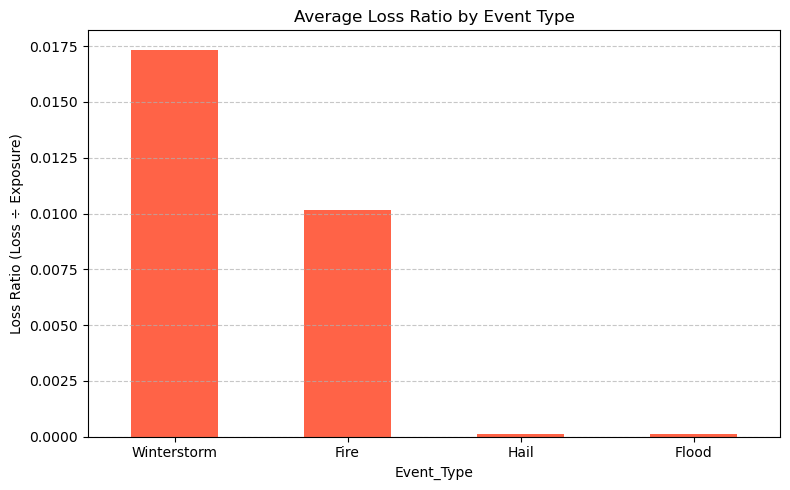

In [65]:
import matplotlib.pyplot as plt

# Calculate loss ratio by event type
loss_by_event = df_all.groupby("Event_Type")[["Total_losses_in_billions", "Total_exposure_in_billions"]].sum()
loss_by_event["Loss_Ratio"] = loss_by_event["Total_losses_in_billions"] / loss_by_event["Total_exposure_in_billions"]

# Plot the loss ratio
plt.figure(figsize=(8, 5))
loss_by_event["Loss_Ratio"].sort_values(ascending=False).plot(kind="bar", color="tomato")
plt.ylabel("Loss Ratio (Loss ÷ Exposure)")
plt.title("Average Loss Ratio by Event Type")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


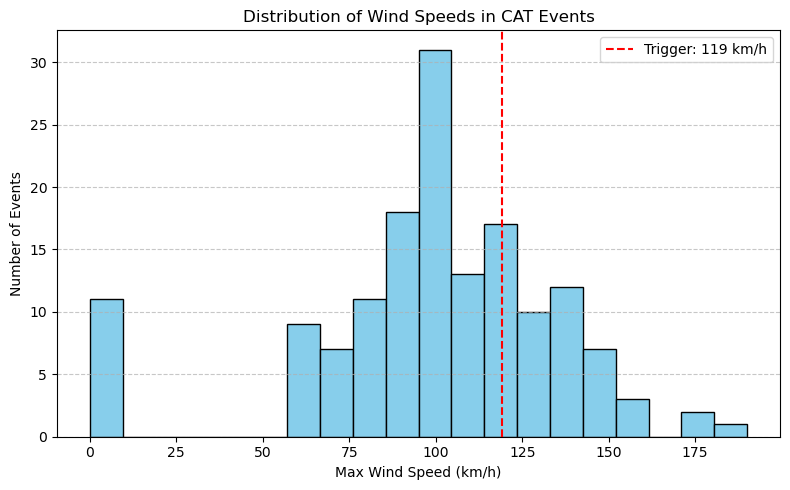

In [67]:
# Plot histogram of wind speed
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
wind_data = df_all["Max_wind_km/h"].dropna()
plt.hist(wind_data, bins=20, color="skyblue", edgecolor="black")
plt.axvline(x=119, color="red", linestyle="--", label="Trigger: 119 km/h")
plt.xlabel("Max Wind Speed (km/h)")
plt.ylabel("Number of Events")
plt.title("Distribution of Wind Speeds in CAT Events")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

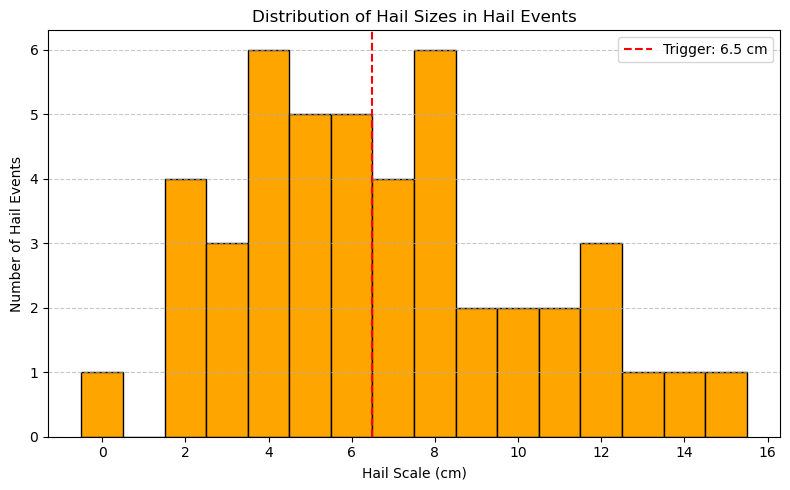

In [69]:
# Plot histogram of hail scale to evaluate the 6.5 cm trigger
# Filter only rows with Hail data
hail_data = df_all[df_all["Event_Type"] == "Hail"]["Hail_scale"].dropna()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(hail_data, bins=range(0, int(hail_data.max()) + 2), color="orange", edgecolor="black", align="left")
plt.axvline(x=6.5, color="red", linestyle="--", label="Trigger: 6.5 cm")
plt.xlabel("Hail Scale (cm)")
plt.ylabel("Number of Hail Events")
plt.title("Distribution of Hail Sizes in Hail Events")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


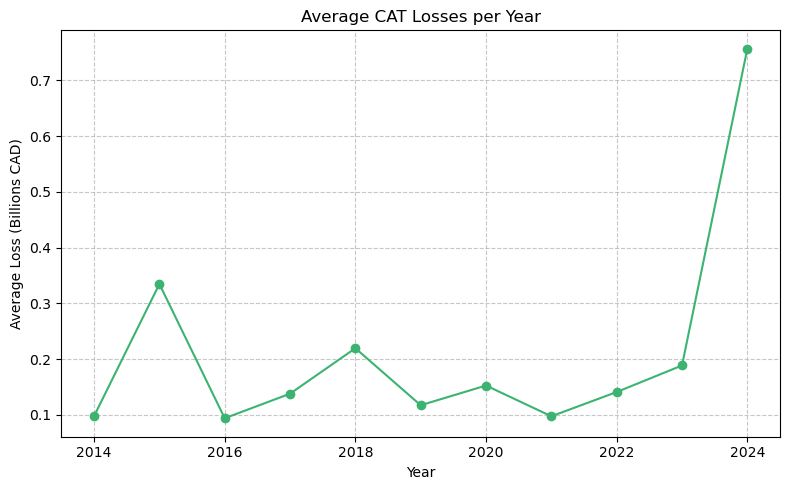

In [71]:
# Average loss over time
avg_loss_by_year = df_all.groupby("Event_year")["Total_losses_in_billions"].mean()

plt.figure(figsize=(8, 5))
avg_loss_by_year.plot(marker='o', linestyle='-', color='mediumseagreen')
plt.title("Average CAT Losses per Year")
plt.xlabel("Year")
plt.ylabel("Average Loss (Billions CAD)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

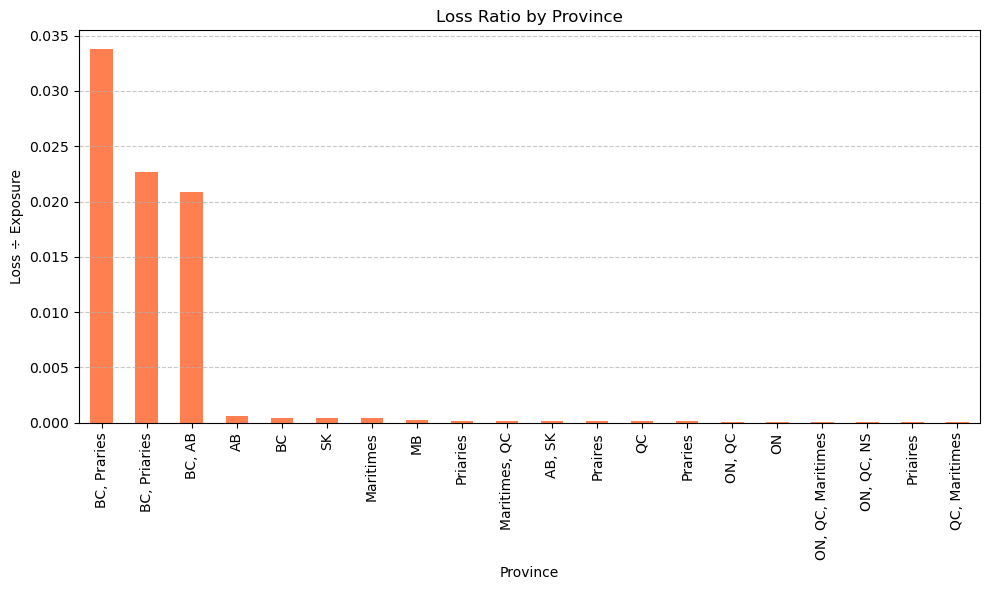

In [75]:
# Calculate loss ratio by province
loss_by_province = df_all.groupby("Provinces")[["Total_losses_in_billions", "Total_exposure_in_billions"]].sum()
loss_by_province["Loss_Ratio"] = loss_by_province["Total_losses_in_billions"] / loss_by_province["Total_exposure_in_billions"]
loss_by_province = loss_by_province.sort_values("Loss_Ratio", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
loss_by_province["Loss_Ratio"].plot(kind="bar", color="coral")
plt.title("Loss Ratio by Province")
plt.ylabel("Loss ÷ Exposure")
plt.xlabel("Province")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

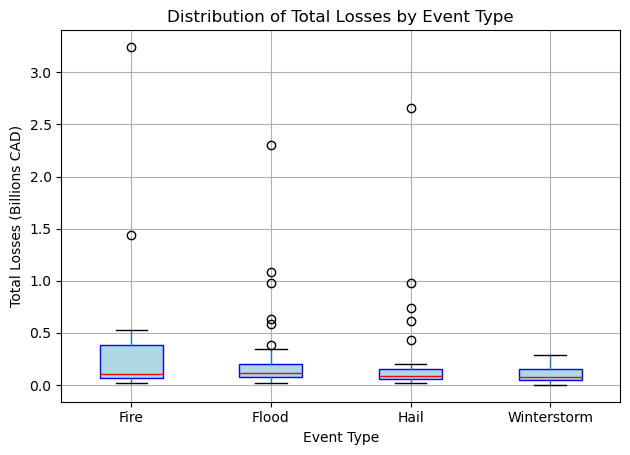

In [77]:
# Create box plot
plt.figure(figsize=(8, 6))
df_all.boxplot(column="Total_losses_in_billions", by="Event_Type", grid=True, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='red'))

plt.title("Distribution of Total Losses by Event Type")
plt.suptitle("")  
plt.xlabel("Event Type")
plt.ylabel("Total Losses (Billions CAD)")
plt.tight_layout()
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Create the high_loss target
loss_threshold = df_all["Total_losses_in_billions"].quantile(0.75)
df_all["high_loss"] = (df_all["Total_losses_in_billions"] >= loss_threshold).astype(int)

# Select features for the model
feature_cols = ["Max_wind_km/h", "Hail_scale", "Max_rainfall_mm", "Hectares_burned", "Structures_destroyed"]
X = df_all[feature_cols].copy()
y = df_all["high_loss"]

# Handle missing values by filling with 0
X = X.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

(conf_matrix, class_report_df.round(3))


(array([[31,  0],
        [13,  2]]),
               precision  recall  f1-score  support
 0                 0.705   1.000     0.827   31.000
 1                 1.000   0.133     0.235   15.000
 accuracy          0.717   0.717     0.717    0.717
 macro avg         0.852   0.567     0.531   46.000
 weighted avg      0.801   0.717     0.634   46.000)

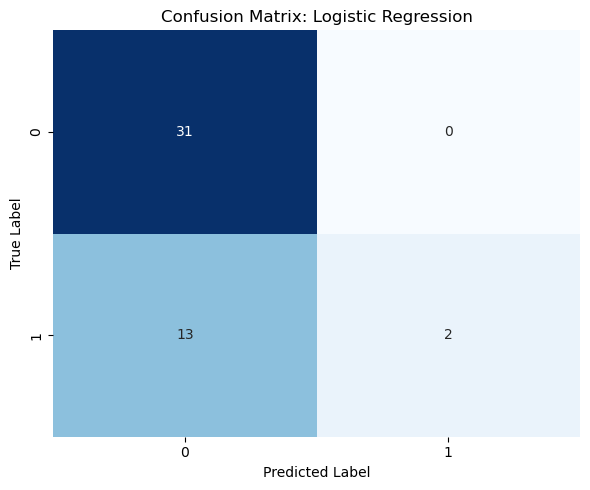

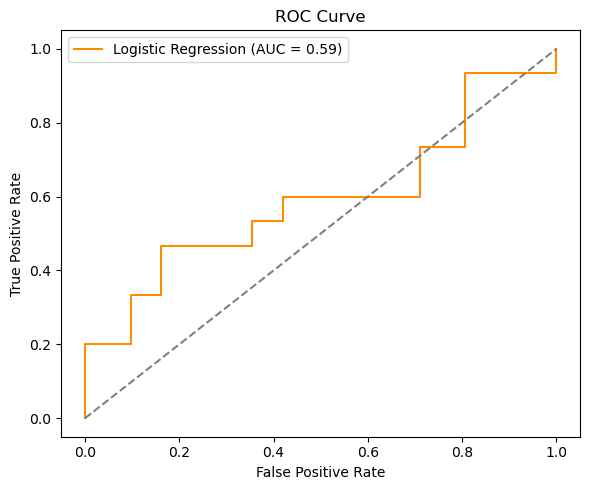

In [81]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ROC Curve
y_probs = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_45151/3377969537.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="Set2")
/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_45151/3377969537.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, ax=axs[1], palette="Set1")


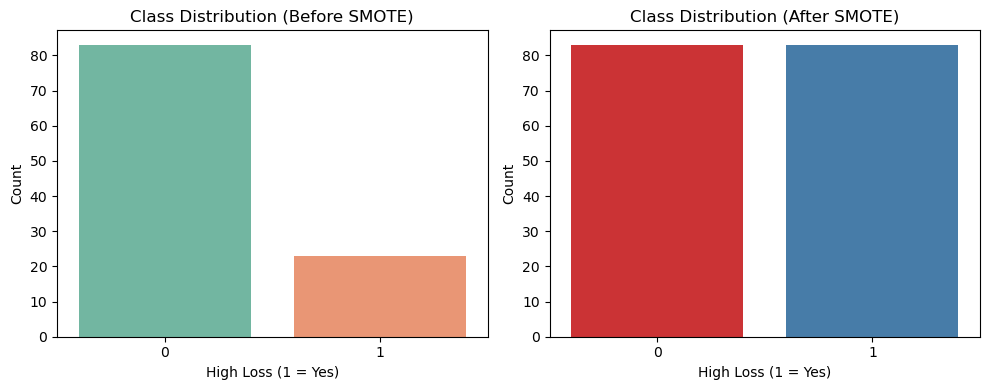

In [83]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualize the class distribution before and after SMOTE
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Before SMOTE
sns.countplot(x=y_train, ax=axs[0], palette="Set2")
axs[0].set_title("Class Distribution (Before SMOTE)")
axs[0].set_xlabel("High Loss (1 = Yes)")
axs[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_train_smote, ax=axs[1], palette="Set1")
axs[1].set_title("Class Distribution (After SMOTE)")
axs[1].set_xlabel("High Loss (1 = Yes)")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


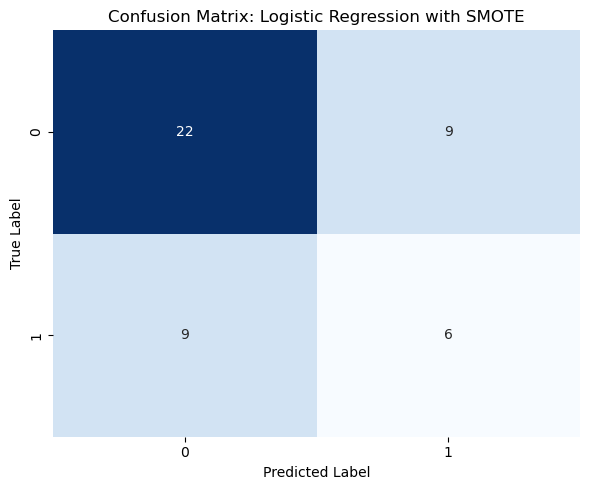

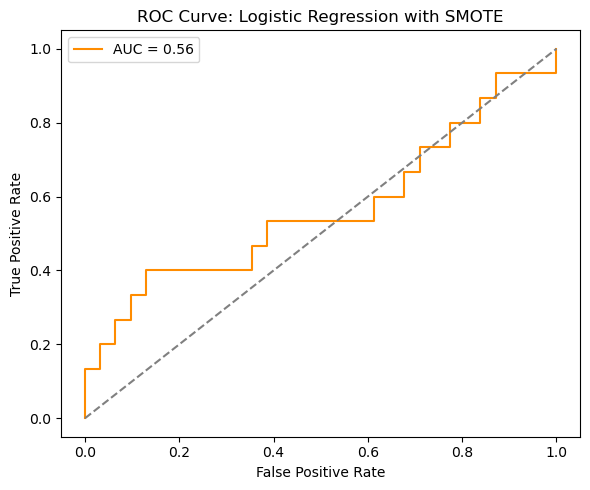

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        31
           1       0.40      0.40      0.40        15

    accuracy                           0.61        46
   macro avg       0.55      0.55      0.55        46
weighted avg       0.61      0.61      0.61        46



In [87]:
# Re-Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

# Predict & evaluate
y_pred = logreg.predict(X_test)
y_probs = logreg.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Logistic Regression with SMOTE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Visualize ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve: Logistic Regression with SMOTE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Print classification report
print(class_report)


In [125]:
import pandas as pd
# Save to logistic CSV
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert it to a DataFrame with labels
labels = ['No', 'Yes']  # Or 0/1 if your classes are numeric
conf_df = pd.DataFrame(conf_matrix,
                       index=pd.Index(labels, name='Actual'),
                       columns=pd.Index(labels, name='Predicted'))

# Convert to long format for Power BI
conf_df_long = conf_df.reset_index().melt(id_vars='Actual', var_name='Predicted', value_name='Count')
conf_df_long['Model'] = 'Logistic Regression'

# Save to CSV
conf_df_long.to_csv('logistic_confusion_matrix.csv', index=False)

In [89]:
# Train with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pandas as pd

# Train
rf_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote_model.fit(X_train_smote, y_train_smote)

# Predict
y_rf_smote_pred = rf_smote_model.predict(X_test)
y_rf_smote_probs = rf_smote_model.predict_proba(X_test)[:, 1]

# Evaluate
rf_smote_conf_matrix = confusion_matrix(y_test, y_rf_smote_pred)
rf_smote_class_report = classification_report(y_test, y_rf_smote_pred)
rf_smote_fpr, rf_smote_tpr, _ = roc_curve(y_test, y_rf_smote_probs)
rf_smote_auc = auc(rf_smote_fpr, rf_smote_tpr)

# Print
print("Confusion Matrix:\n", rf_smote_conf_matrix)
print("\nClassification Report:\n", rf_smote_class_report)
print(f"\nROC AUC Score: {rf_smote_auc:.3f}")


Confusion Matrix:
 [[23  8]
 [10  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        31
           1       0.38      0.33      0.36        15

    accuracy                           0.61        46
   macro avg       0.54      0.54      0.54        46
weighted avg       0.60      0.61      0.60        46


ROC AUC Score: 0.560


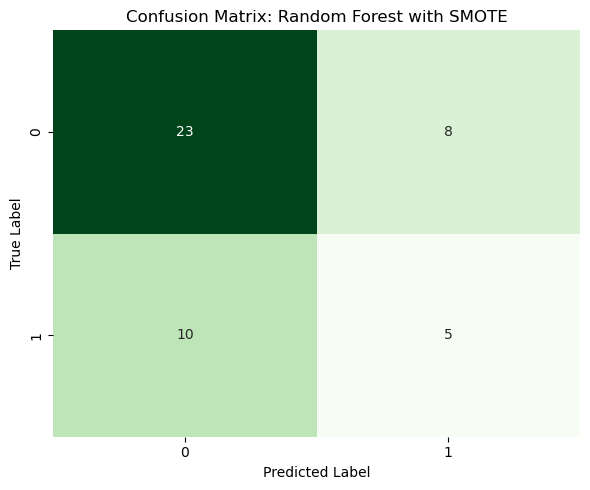

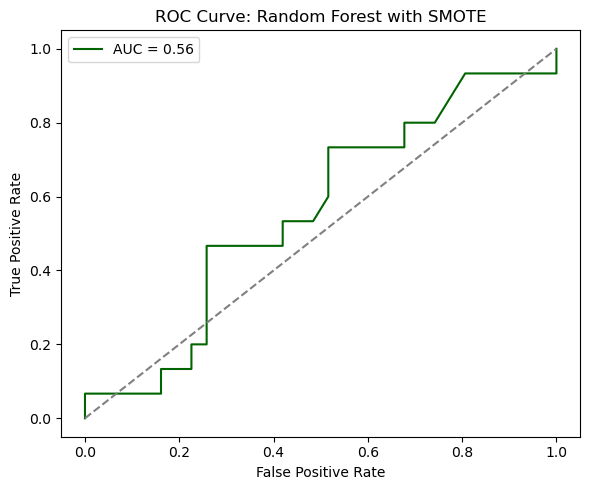

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(rf_smote_conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix: Random Forest with SMOTE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(rf_smote_fpr, rf_smote_tpr, label=f"AUC = {rf_smote_auc:.2f}", color="darkgreen")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve: Random Forest with SMOTE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


In [127]:
import pandas as pd

# Define labels for clarity
labels = ['No', 'Yes']  

# Convert confusion matrix to a labeled DataFrame
rf_conf_df = pd.DataFrame(rf_smote_conf_matrix,
                          index=pd.Index(labels, name='Actual'),
                          columns=pd.Index(labels, name='Predicted'))

# Reshape to long format for Power BI
rf_conf_long = rf_conf_df.reset_index().melt(id_vars='Actual',
                                             var_name='Predicted',
                                             value_name='Count')
rf_conf_long['Model'] = 'Random Forest'

# Save to CSV
rf_conf_long.to_csv('rf_confusion_matrix.csv', index=False)

In [95]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Predict
y_xgb_pred = xgb_model.predict(X_test)
y_xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
xgb_conf_matrix = confusion_matrix(y_test, y_xgb_pred)
xgb_class_report = classification_report(y_test, y_xgb_pred)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Print
print("Confusion Matrix:\n", xgb_conf_matrix)
print("\nClassification Report:\n", xgb_class_report)
print(f"\nROC AUC Score: {xgb_auc:.3f}")


Confusion Matrix:
 [[25  6]
 [10  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76        31
           1       0.45      0.33      0.38        15

    accuracy                           0.65        46
   macro avg       0.58      0.57      0.57        46
weighted avg       0.63      0.65      0.64        46


ROC AUC Score: 0.604


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:36:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [131]:
import pandas as pd

# Define class labels
labels = ['No', 'Yes']

# Convert the confusion matrix to a DataFrame
xgb_conf_df = pd.DataFrame(xgb_conf_matrix,
                           index=pd.Index(labels, name='Actual'),
                           columns=pd.Index(labels, name='Predicted'))

# Convert to long format for Power BI
xgb_conf_long = xgb_conf_df.reset_index().melt(id_vars='Actual',
                                                var_name='Predicted',
                                                value_name='Count')
xgb_conf_long['Model'] = 'XGBoost'

# Save to CSV
xgb_conf_long.to_csv('xgb_confusion_matrix.csv', index=False)


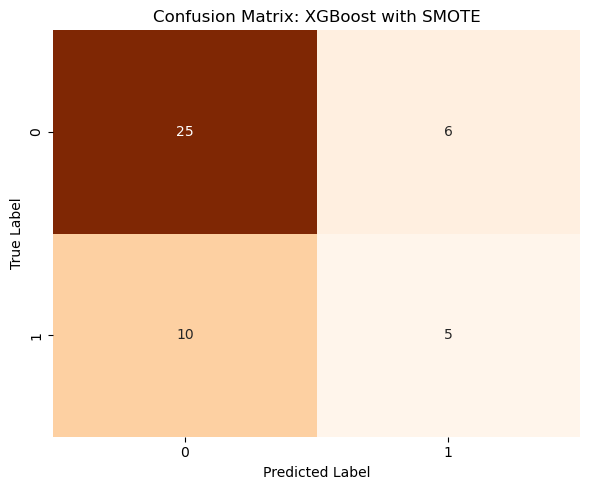

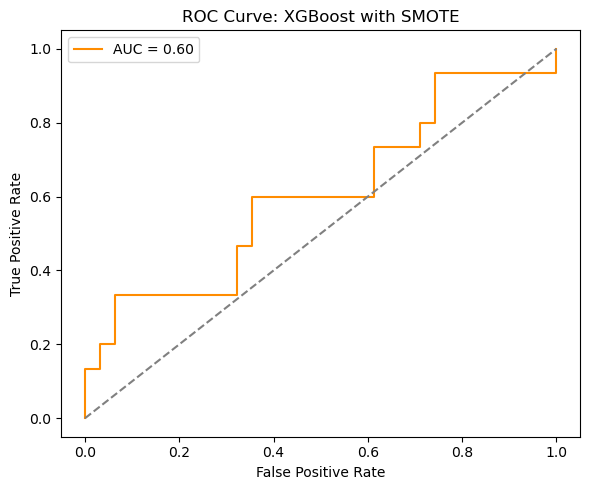

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix: XGBoost with SMOTE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(xgb_fpr, xgb_tpr, label=f"AUC = {xgb_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve: XGBoost with SMOTE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_45151/1854667586.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")


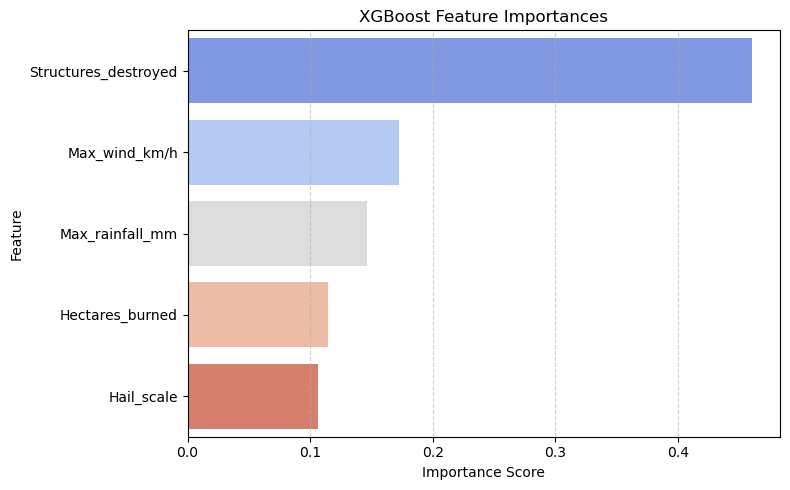

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances for XGBoost
importance_values = xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance_values
}).sort_values("Importance", ascending=False)

# plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [121]:
importance_df.to_csv("feature_importance_XGBoost.csv", index=False)

/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_45151/3129366366.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="YlGnBu")


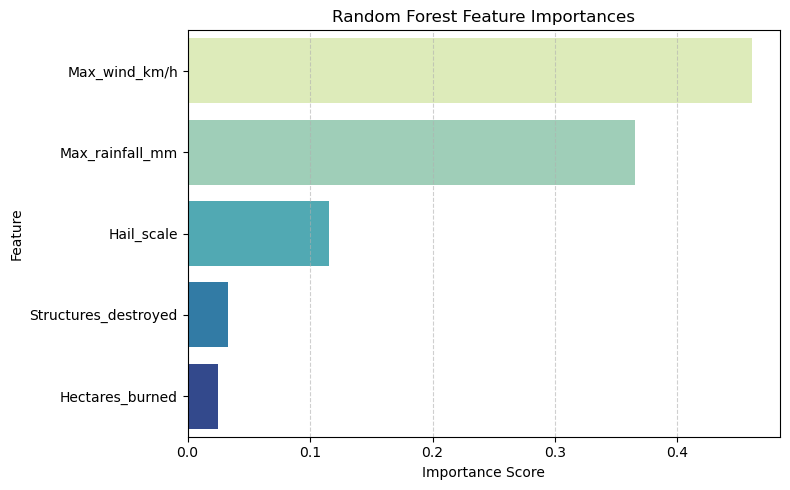

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare importance data
rf_importance = rf_smote_model.feature_importances_
rf_features = X.columns

rf_importance_df = pd.DataFrame({
    "Feature": rf_features,
    "Importance": rf_importance
}).sort_values("Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="YlGnBu")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [123]:
rf_importance_df.to_csv("feature_importance_Random_Forest.csv", index=False)

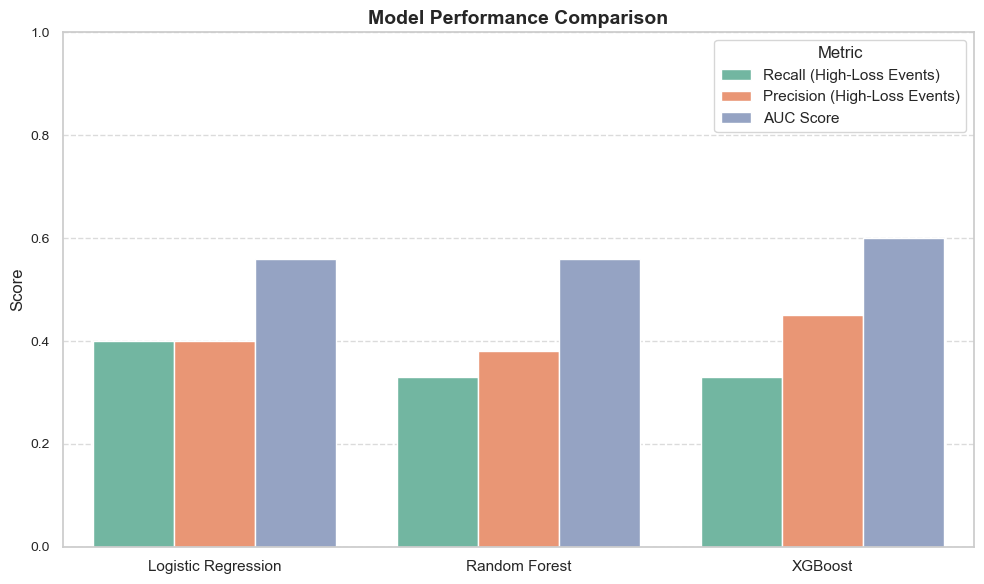

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# style settings
sns.set(style="whitegrid")

# Performance metrics
data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Recall (High-Loss Events)": [0.40, 0.33, 0.33],
    "Precision (High-Loss Events)": [0.40, 0.38, 0.45],
    "AUC Score": [0.56, 0.56, 0.60]
}

df_scores = pd.DataFrame(data)
df_scores = df_scores.set_index("Model")

# Melt the DataFrame for seaborn grouped barplot
df_melted = df_scores.reset_index().melt(id_vars="Model", var_name="Metric", value_name="Score")

# grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")

# plot
plt.title("Model Performance Comparison", fontsize=14, weight="bold")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xlabel("")
plt.legend(title="Metric")
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [119]:
df_scores.to_csv("model_performance.csv", index = False)

<Figure size 800x500 with 0 Axes>

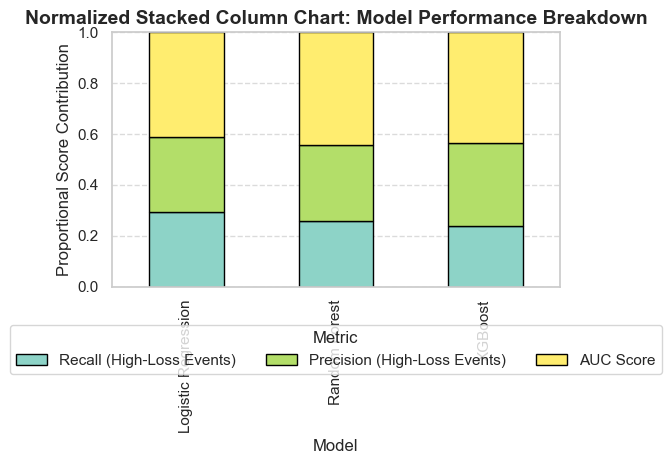

In [115]:
# Recreate df_heatmap 
data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Recall (High-Loss Events)": [0.40, 0.33, 0.33],
    "Precision (High-Loss Events)": [0.40, 0.38, 0.45],
    "AUC Score": [0.56, 0.56, 0.60]
}

# Create DataFrame and set index
df = pd.DataFrame(data)
df_heatmap = df.set_index("Model")

# Normalize each row to sum to 1
df_normalized = df_heatmap.div(df_heatmap.sum(axis=1), axis=0)

# Plot normalized stacked column chart
plt.figure(figsize=(8, 5))
df_normalized.plot(kind='bar', stacked=True, colormap='Set3', edgecolor='black')

# plot
plt.title("Normalized Stacked Column Chart: Model Performance Breakdown", fontsize=14, weight="bold")
plt.ylabel("Proportional Score Contribution")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3, title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
